In [166]:
import os
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt
%matplotlib inline

def plot_perf(file_name, varx, ds):
    if varx == 'min':
        varx = 'amin'
    if varx == 'max':
        varx = 'amax'

    if varx not in ('amin', 'amax', 'mean'):
        return "Please select from ('min', 'max', 'mean')"
    
    df1 = pd.read_csv(file_name, header=-1, skiprows=4)
    ttl_var = file_name.split('_')[0].replace('./','')
    df1.columns = ['Epoch','Epsilon', 'Batch','Ys','Recall','Precision','F1', 'Query']
    df1['Recall'] = df1['Recall'].str.replace("Recall = ",'').str.replace('\{','').astype(float)
    df1['Precision'] = df1['Precision'].str.replace("Precision = ",'').str.replace('\}','').astype(float)
    df1['F1'] = df1['F1'].str.replace("F1 = ",'').str.replace('\}\t','').astype(float)
    df1['Epoch'] = df1['Epoch'].str.replace("Epoch", '').astype(int)
    df1['Ys1'] = df1['Ys'].str.replace(' sum\(y\)', '').str.replace('/len\(y\) = ','').str.split("/").str[0].astype(int)
    df1['YsT'] = df1['Ys'].str.replace(' sum\(y\)', '').str.replace('/len\(y\) = ','').str.split("/").str[1].astype(int)
    df1['Ys0'] = df1['YsT'] - df1['Ys1']
    ms = []
#     for metric in ('Ys0', 'Ys1', 'YsT'):
    for metric in ('Precision', 'Recall', 'F1'):    
        df1ss = df1[df1['Query']==' query = '+ds]
        grouped = df1ss[[metric,'Epoch']].groupby(['Epoch'])
        df2 = grouped.agg({np.min, np.mean, np.max })
        df2.columns = df2.columns.droplevel(0)
        df2 = df2.rename_axis(None, axis=1)
        df2 = df2.reset_index()
        ms.append( (metric, df2[varx] ))
        print('Average max performance of %s is %.6f', (metric, df2['mean'].max()))

    plt.figure(figsize=(16, 8))
    plt.title(ttl_var + ' average precision, recall, and f1 across epochs')
    plt.plot(df2['Epoch'], ms[0][1], label=ms[0][0], c='purple')
    plt.plot(df2['Epoch'], ms[1][1], label=ms[1][0], c='blue')
    plt.plot(df2['Epoch'], ms[2][1], label=ms[2][0], c='red')
#     plt.ylim(0,1)
    plt.xlabel('Epochs')
    plt.legend(loc='lower left')
    plt.grid()
    plt.show()
    
    return df1

('Average max performance of %s is %.6f', ('Precision', 0.06012))
('Average max performance of %s is %.6f', ('Recall', 0.140845))
('Average max performance of %s is %.6f', ('F1', 0.084269999999999998))


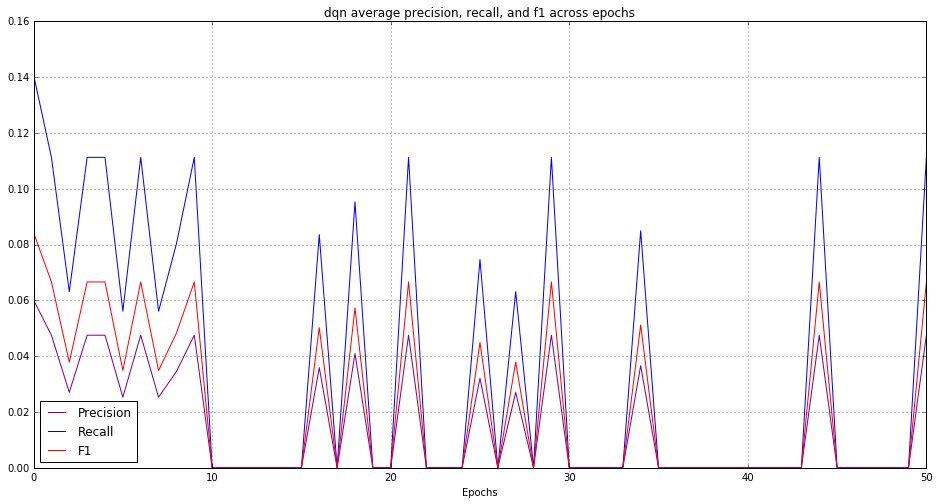

In [162]:
bowdf = plot_perf('./dqn_full_bow_model_perf.txt', 'mean', 'aurora')

('Average max performance of %s is %.6f', ('Precision', 0.0082244999999999992))
('Average max performance of %s is %.6f', ('Recall', 0.10733000000000001))
('Average max performance of %s is %.6f', ('F1', 0.0152785))


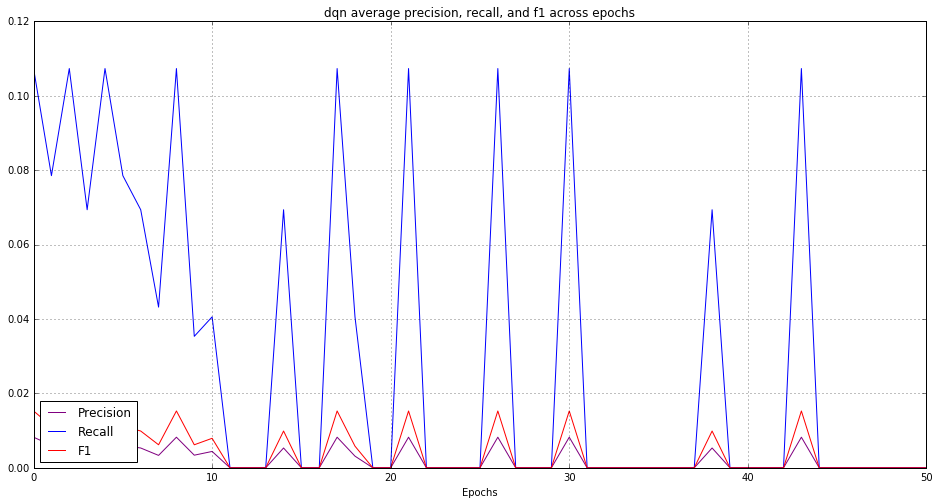

In [163]:
bowdf = plot_perf('./dqn_full_bow_model_perf.txt', 'mean', 'pakistan')

('Average max performance of %s is %.6f', ('Precision', 0.06012))
('Average max performance of %s is %.6f', ('Recall', 0.140845))
('Average max performance of %s is %.6f', ('F1', 0.084269999999999998))


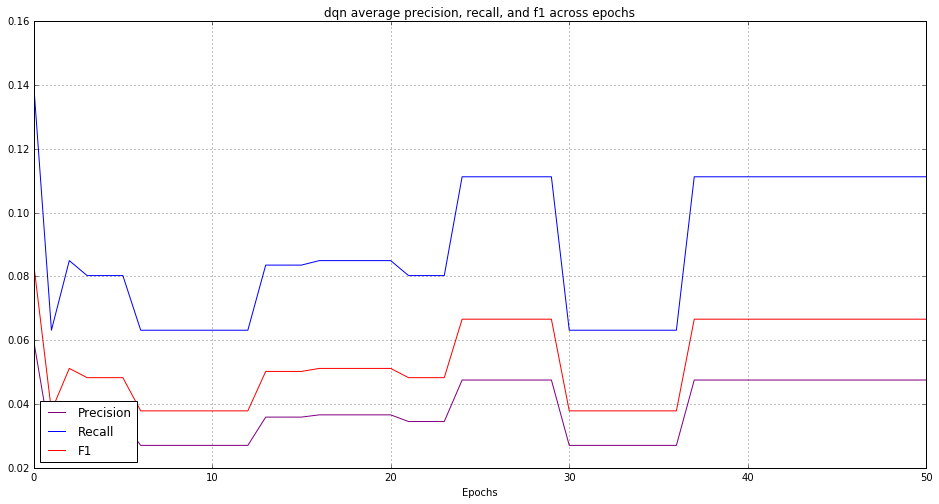

In [164]:
rnndf = plot_perf('./dqn_full_lstm_model_perf.txt', 'mean', 'aurora')

('Average max performance of %s is %.6f', ('Precision', 0.0082244999999999992))
('Average max performance of %s is %.6f', ('Recall', 0.10733000000000001))
('Average max performance of %s is %.6f', ('F1', 0.0152785))


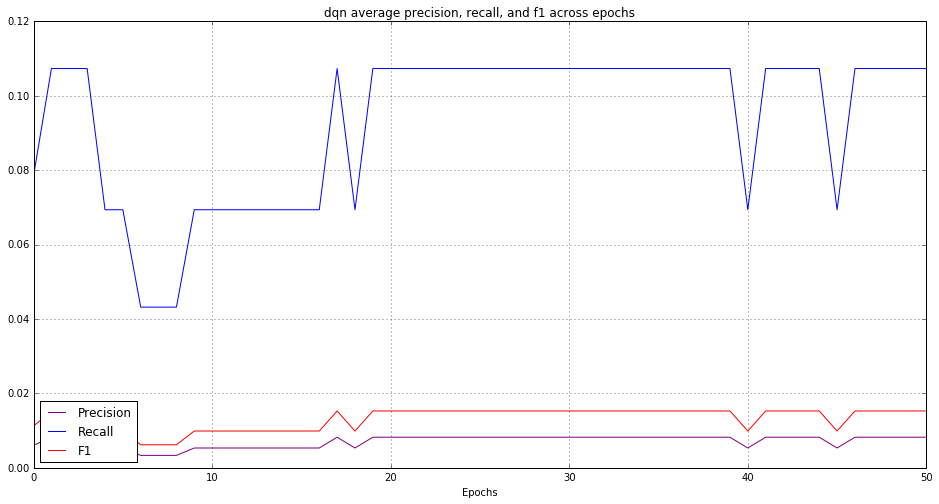

In [165]:
rnndf = plot_perf('./dqn_full_lstm_model_perf.txt', 'mean', 'pakistan')

In [140]:
bowdf.head()

,Epoch,Query,Epsilon,Batch,Ys,Recall,Precision,F1,Ys1,YsT,Ys0
0,0,query = aurora,epsilon = 1.000,minibatch 1/5,sum(y)/len(y) = 57/199,0.081690,0.087834,0.084651,57,199,142
1,0,query = aurora,epsilon = 1.000,minibatch 2/5,sum(y)/len(y) = 55/200,0.089202,0.095477,0.092233,55,200,145
2,0,query = aurora,epsilon = 1.000,minibatch 3/5,sum(y)/len(y) = 58/200,0.181221,0.193872,0.187333,58,200,142
3,0,query = aurora,epsilon = 1.000,minibatch 4/5,sum(y)/len(y) = 53/200,0.121127,0.129583,0.125212,53,200,147
4,0,query = aurora,epsilon = 1.000,minibatch 5/5,sum(y)/len(y) = 57/200,0.106573,0.114013,0.110167,57,200,143


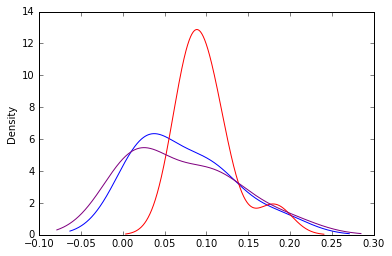

In [147]:
bowdf[ bowdf['Epoch']==0].F1.plot(kind='density', color='blue')
bowdf[ bowdf['Epoch']==0].Recall.plot(kind='density', color='red')
bowdf[ bowdf['Epoch']==0].Precision.plot(kind='density', color = 'purple')

('Average max performance of %s is %.6f', ('Ys0', 153.0))
('Average max performance of %s is %.6f', ('Ys1', 193.69999999999999))
('Average max performance of %s is %.6f', ('YsT', 200.0))


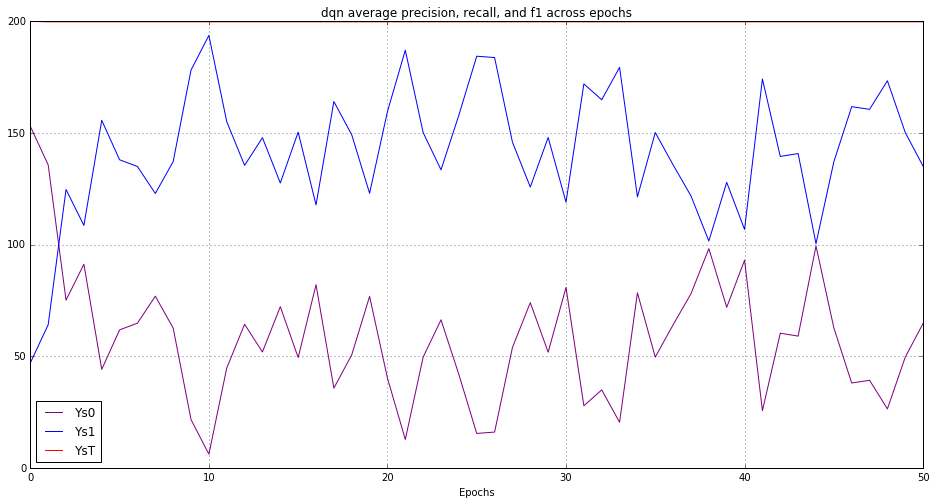

In [131]:
plot_perf('./dqn_full_lstm_model_perf.txt', 'mean')

('Average max performance of %s is %.6f', ('Precision', 0.040273880000000005))
('Average max performance of %s is %.6f', ('Recall', 0.094422680000000023))
('Average max performance of %s is %.6f', ('F1', 0.056463840000000015))


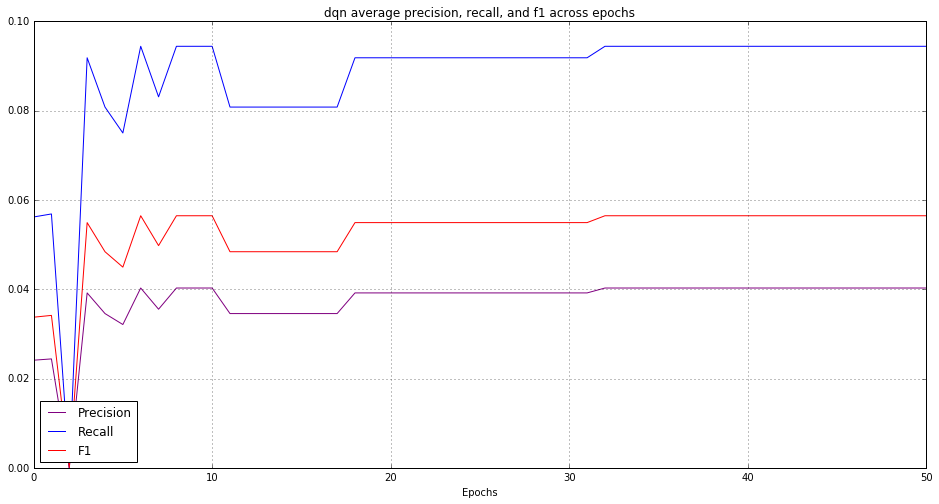

In [56]:
plot_perf('./dqn_lstm_model_perf.txt', 'mean')

In [146]:
plot_perf('./dqn_bow_model_perf.txt', 'mean')

CParserError: Error tokenizing data. C error: Expected 3 fields in line 6, saw 7
